In [1]:
import os #for file handling
import cv2 #for image processing
import tensorflow as tf #for dl
from tensorflow.keras.layers import Flatten, Dense
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting graphs
from emnist import extract_training_samples, extract_test_samples
import warnings
warnings.simplefilter("ignore")

In [2]:
x_train, y_train=extract_training_samples('letters')
x_test, y_test=extract_test_samples('letters')

In [3]:
x_train.shape

(124800, 28, 28)

In [4]:
x_test.shape

(20800, 28, 28)

In [5]:
test=16
first_image = x_train[test]
first_result= y_train[test]
print(first_image.shape)

(28, 28)


In [6]:
x_train = x_train / 255.0  # Scale pixel values to [0, 1]
x_test = x_test / 255.0

In [7]:
# Preprocess the labels to convert them to integers
y_train = y_train - 1  # EMNIST labels start from 1, subtract 1 to make them start from 0
y_test = y_test - 1

In [8]:
model=tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(80, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(26, activation="softmax"))

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
3900/3900 [==============================] - 13s 3ms/step - loss: 0.7983 - accuracy: 0.7619
Epoch 2/5
3900/3900 [==============================] - 11s 3ms/step - loss: 0.4671 - accuracy: 0.8542
Epoch 3/5
3900/3900 [==============================] - 11s 3ms/step - loss: 0.3990 - accuracy: 0.8742
Epoch 4/5
3900/3900 [==============================] - 11s 3ms/step - loss: 0.3578 - accuracy: 0.8862
Epoch 5/5
3900/3900 [==============================] - 11s 3ms/step - loss: 0.3334 - accuracy: 0.8931


In [11]:
model.save('alphabets.model')

INFO:tensorflow:Assets written to: alphabets.model\assets


INFO:tensorflow:Assets written to: alphabets.model\assets


In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

650/650 [==============================] - 2s 2ms/step - loss: 0.3842 - accuracy: 0.8845
Test Loss: 0.3842, Test Accuracy: 0.8845


1/1 [==============================] - 0s 209ms/step
				  The letter is probably:
						' N '


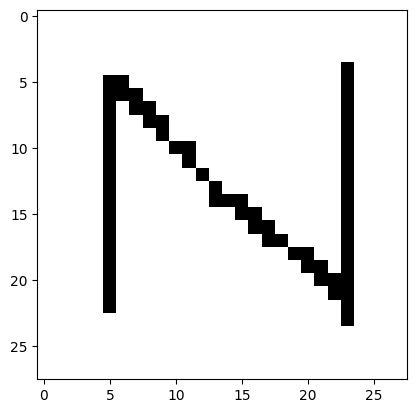

In [15]:
#load and use the model
model=tf.keras.models.load_model('alphabets.model')

#loading the image
img=cv2.imread(f"alphabets/alphaN.png")[:,:,0]

#inverting the image
img=np.invert(np.array([img]))

#make prediction
prediction=model.predict(img)
predicted_label = np.argmax(prediction)
recognized_character = chr(predicted_label + ord('A'))  # Alphabets

print("\t\t\t\t  The letter is probably:\n\t\t\t\t\t\t'", recognized_character, "'")
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()